In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import shutil
import random
import warnings
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
# from livelossplot.tf_keras import PlotLossesCallback
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
base_dir = "../input/dogs-vs-cats"
train_dir = os.path.join(base_dir, "train.zip")


In [3]:
import zipfile
with zipfile.ZipFile(train_dir,"r") as z:
    z.extractall()
    


In [4]:
train_path="./train" 
os.chdir('train')
# print(os.listdir(""))
if os.path.isdir('../trainn/dog') is False:
    os.mkdir('../test')
    os.mkdir('../valid')
    os.mkdir("../trainn")
    os.mkdir('../trainn/dog')    
    os.mkdir('../trainn/cat') 
    os.mkdir('../test/dog')    
    os.mkdir('../test/cat')    
    os.mkdir('../valid/dog')    
    os.mkdir('../valid/cat')  
    for c in random.sample(glob.glob("cat*"), 500):
        shutil.move(c, '../trainn/cat')
    for c in random.sample(glob.glob("dog*"), 500):
        shutil.move(c, '../trainn/dog')
    for c in random.sample(glob.glob("cat*"), 50):
        shutil.move(c, '../test/cat')
    for c in random.sample(glob.glob("dog*"), 50):
        shutil.move(c, '../test/dog')
    for c in random.sample(glob.glob("cat*"), 100):
        shutil.move(c, '../valid/cat')
    for c in random.sample(glob.glob("dog*"), 100):
        shutil.move(c, '../valid/dog')
    

In [5]:
os.chdir('..')

In [6]:
print(os.listdir("test/dog"))

['dog.3364.jpg', 'dog.3243.jpg', 'dog.12347.jpg', 'dog.11631.jpg', 'dog.3047.jpg', 'dog.10309.jpg', 'dog.1468.jpg', 'dog.5507.jpg', 'dog.10095.jpg', 'dog.9679.jpg', 'dog.1672.jpg', 'dog.10654.jpg', 'dog.8980.jpg', 'dog.4342.jpg', 'dog.924.jpg', 'dog.3971.jpg', 'dog.4940.jpg', 'dog.7448.jpg', 'dog.2669.jpg', 'dog.10623.jpg', 'dog.10704.jpg', 'dog.9796.jpg', 'dog.2757.jpg', 'dog.2739.jpg', 'dog.2636.jpg', 'dog.6569.jpg', 'dog.7095.jpg', 'dog.11703.jpg', 'dog.7521.jpg', 'dog.6835.jpg', 'dog.6869.jpg', 'dog.12193.jpg', 'dog.7113.jpg', 'dog.4060.jpg', 'dog.9368.jpg', 'dog.10754.jpg', 'dog.1646.jpg', 'dog.10185.jpg', 'dog.3329.jpg', 'dog.2587.jpg', 'dog.8846.jpg', 'dog.6315.jpg', 'dog.6770.jpg', 'dog.257.jpg', 'dog.4727.jpg', 'dog.4279.jpg', 'dog.11475.jpg', 'dog.12355.jpg', 'dog.1557.jpg', 'dog.11421.jpg']


In [7]:
train_path="./trainn" 
test_path="./test"
valid_path="./valid"

In [8]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False) 

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [9]:
imgs, labels =next(train_batches) #generate a batch of imgs and labels (batch size is 10)

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

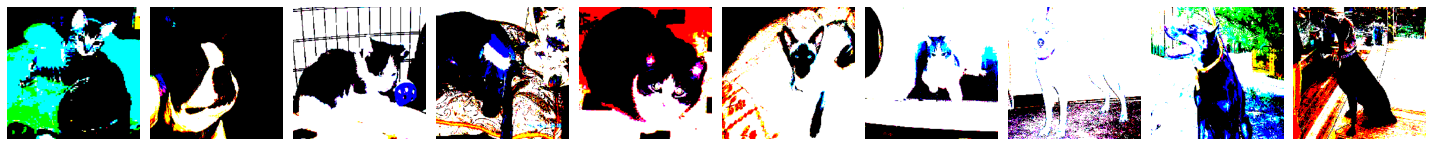

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
plotImages(imgs)
print(labels)

In [12]:
model=Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=(224, 224, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2,2), strides=2),
     Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2,2), strides=2),
     Flatten(),
    Dense(units=2, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

# this model is trash so we gonna use pretrained model hehe

Epoch 1/10
100/100 - 7s - loss: 26.0987 - accuracy: 0.5410 - val_loss: 5.9667 - val_accuracy: 0.5950
Epoch 2/10
100/100 - 5s - loss: 2.7978 - accuracy: 0.7460 - val_loss: 2.9188 - val_accuracy: 0.6150
Epoch 3/10
100/100 - 5s - loss: 0.5279 - accuracy: 0.8860 - val_loss: 2.9140 - val_accuracy: 0.6400
Epoch 4/10
100/100 - 5s - loss: 0.2928 - accuracy: 0.9370 - val_loss: 2.5058 - val_accuracy: 0.6700
Epoch 5/10
100/100 - 5s - loss: 0.1126 - accuracy: 0.9720 - val_loss: 2.7500 - val_accuracy: 0.6700
Epoch 6/10
100/100 - 5s - loss: 0.0218 - accuracy: 0.9930 - val_loss: 2.5171 - val_accuracy: 0.6450
Epoch 7/10
100/100 - 4s - loss: 0.0116 - accuracy: 0.9950 - val_loss: 2.5857 - val_accuracy: 0.6500
Epoch 8/10
100/100 - 5s - loss: 8.7011e-04 - accuracy: 1.0000 - val_loss: 2.5337 - val_accuracy: 0.6400
Epoch 9/10
100/100 - 5s - loss: 6.2940e-04 - accuracy: 1.0000 - val_loss: 2.5601 - val_accuracy: 0.6550
Epoch 10/10
100/100 - 5s - loss: 4.9586e-04 - accuracy: 1.0000 - val_loss: 2.5421 - val_acc

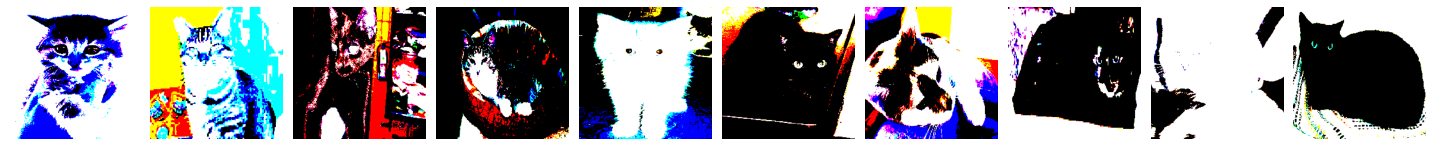

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [16]:
test_imgs, test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [17]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
predictions=model.predict(x=test_batches)

In [19]:
p=np.round(predictions)

In [20]:
cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

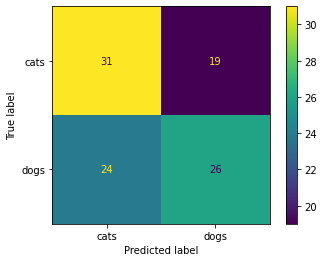

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["cats", "dogs"])
disp = disp.plot()
plt.show()

In [22]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

# **Pretrained model**

In [23]:
# download vgg16 model
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [24]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
#convert vgg16 from functional model to sequential model (because it is more confusing)
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [27]:
for layer in model.layers:
    layer.trainable=False

In [28]:
model.add(Dense(units=2, activation="softmax"))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [30]:
imgs, labels=next(train_batches)

In [33]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 131s - loss: 0.3107 - accuracy: 0.8720 - val_loss: 0.1472 - val_accuracy: 0.9550
Epoch 2/5
100/100 - 130s - loss: 0.0946 - accuracy: 0.9660 - val_loss: 0.1104 - val_accuracy: 0.9650
Epoch 3/5
100/100 - 130s - loss: 0.0603 - accuracy: 0.9760 - val_loss: 0.0831 - val_accuracy: 0.9800
Epoch 4/5
100/100 - 130s - loss: 0.0424 - accuracy: 0.9880 - val_loss: 0.0781 - val_accuracy: 0.9800
Epoch 5/5
100/100 - 130s - loss: 0.0331 - accuracy: 0.9910 - val_loss: 0.0755 - val_accuracy: 0.9800


In [37]:
predictions=model.predict(x=test_batches)

In [38]:
cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

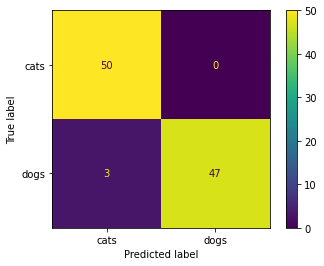

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["cats", "dogs"])
disp = disp.plot()
plt.show()

In [40]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)